In this notebook we go over some basic NLP related code.

# Character co-ocurrences, is it useful?

Let's create a co-occurence matrix for characters in a document. We say that two characters are co-ocurrent if they show in the same word.

In [20]:
import numpy as np
import re

In [2]:
abc = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'
print('There are %d characters in abc.'%len(abc))

There are 52 characters in abc.


We clean the data so we only have the characters from the alphabet. 

In [3]:
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ",raw)
    words = clean.split()
    return words

Next, we open the book 'The Picture of Dorian Gray', and create a list of all the words on it

In [4]:
book=open('./data/dorian.txt','r')
list_of_words=sentence_to_wordlist(book.read())

So, for example, word 1313 is 

In [5]:
list_of_words[1313]

'then'

and there are a total of 83526 words. Many repeated!!

In [6]:
len(list_of_words)

83526

The co-occurence matrix should be 52x52

In [7]:
cooc = np.zeros((52,52),np.float64)

and create a function to update this matrix given a word

In [8]:
def update_cooc(word):
    for char1 in word:
        for char2 in word:
            if char1!=char2:
                one_hot_1 = abc.index(char1)
                one_hot_2 = abc.index(char2)
                cooc[one_hot_1,one_hot_2]+=1

In [9]:
for word in list_of_words:
    update_cooc(word)

In [10]:
cooc

array([[  0.,   5.,  57., ...,   2.,  13.,   2.],
       [  5.,   0.,   3., ...,   0.,  12.,   1.],
       [ 57.,   3.,   0., ...,   1.,  16.,   4.],
       ..., 
       [  2.,   0.,   1., ...,   0.,  61.,   0.],
       [ 13.,  12.,  16., ...,  61.,   0.,   7.],
       [  2.,   1.,   4., ...,   0.,   7.,   0.]])

So for example the letter a and the letter z appear together 114 times.

In [11]:
cooc[26,51]

114.0

meanwhile, t and h appear together 12408 times.

In [12]:
cooc[abc.index('t'),abc.index('h')]

12408.0

So we can conclude that in general, there's a larger chance for the letters h and t to be together on a word, is there? (Remember we are counting repetition so the word 'the' appears quite often. Also, does this add to semantic meaning, or just says something about the english language, is it useful? Maybe for solving crosswords...

# Co-occurrence matrix for words in sentences 

Instead we could go over the book and create a matrix that counts the co-ocurrences of words in sentences, before doing this approach and to simplify a bit we make everything lowercase.

In [13]:
book=open('./data/dorian.txt','r')
book_string= book.read().lower()

We obtained the list of words as before.

In [14]:
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ",raw)
    words = clean.split()
    return words

In [15]:
list_of_words=list(set(sentence_to_wordlist(book_string)))

and note that there are 7122 different words.

In [16]:
len(list_of_words)

7122

We use nltk to obtain the sentences, this could be done by hand but it is a pain.

In [17]:
from nltk.tokenize import sent_tokenize
list_of_sentences=sent_tokenize(book_string)

So, for example we have

In [18]:
list_of_sentences[20:22]

['no artist has ethical sympathies.',
 'an ethical sympathy in an artist is an unpardonable mannerism of style.']

We create our soon to be co-occurrence matrix

In [19]:
cooc = np.zeros((7122,7122),np.float64)

We create a function that loops over the words on a sentence and updates the co-ocurrence matrix.

In [13]:
def process_sentence(sentence):
    words_in_sentence =sentence_to_wordlist(sentence)
    list_of_indeces = [list_of_words.index(word) for word in words_in_sentence]
    for index1 in list_of_indeces:
        for index2 in list_of_indeces:
            if index1!=index2:
                cooc[index1,index2]+=1
                    

Now, we go over all the sentences.

In [14]:
for sentence in list_of_sentences:
    process_sentence(sentence)

let's peek at the cooc matrix.

In [18]:
cooc

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

What??? did we do anything? Well, the matrix is really sparse. Let's see what happens for the 16th word. 'dead', but let's select only the relevant ones, that is the ones that don't appear to often, but often enough.

In [40]:
print('The 16th word is:',list_of_words[15])
for j in range(7122):
    if cooc[15,j]>3 and cooc[15,j]<6:
        print(list_of_words[15],list_of_words[j],cooc[15,j])

The 16th word is: dead
dead but 4.0
dead or 4.0
dead thought 4.0
dead blood 4.0
dead were 4.0
dead have 4.0
dead by 5.0
dead upon 4.0
dead been 4.0
dead is 5.0
dead her 5.0
dead there 5.0
dead those 5.0
dead don 5.0
dead own 5.0
dead body 4.0
dead one 4.0
dead from 5.0
dead lying 5.0
dead t 5.0


now, let's find the closest word to dead. First we recall we are using the cosine distance.

In [44]:
from numpy.linalg import norm
def cos_dis(u,v):
    dist = 1.0 - np.dot(u, v) / (norm(u) * norm(v))
    return dist

And we list the words in increasing order of distance.

In [51]:
sorted(list_of_words, key = lambda word: cos_dis(cooc[15,:],cooc[list_of_words.index(word),:]))

/home/felipe/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


['dead',
 'passion',
 'with',
 'white',
 'young',
 'painted',
 'strange',
 'stained',
 'covered',
 'as',
 'over',
 'were',
 'gave',
 'made',
 'sin',
 'second',
 'which',
 'soul',
 'used',
 'such',
 'immediately',
 'sought',
 'madness',
 'had',
 'its',
 'he',
 'wine',
 'poison',
 'hated',
 'blood',
 'jewelled',
 'room',
 'awful',
 'out',
 'a',
 'child',
 'bride',
 'murdered',
 'passions',
 'father',
 'valued',
 'known',
 'cards',
 'house',
 'son',
 'mockery',
 'honour',
 'coloured',
 'thousand',
 'sickened',
 'venetian',
 'living',
 'most',
 'page',
 'little',
 'himself',
 'title',
 'great',
 'doctor',
 'innocent',
 'name',
 'conscious',
 'debauchery',
 'other',
 'vi',
 'real',
 'napkin',
 'effigy',
 'warned',
 'iv',
 'lads',
 'comeliness',
 'florence',
 'fratricide',
 'cured',
 'filippo',
 'centaurs',
 'ezzelin',
 'simonetto',
 'rimini',
 'leper',
 'enamels',
 'isotta',
 'infused',
 'hounds',
 'gambling',
 'malatesta',
 'grifonetto',
 'perugia',
 'nymphs',
 'ginevra',
 'torpid',
 'suck

Let's try the same in a lower dimentional space.

In [52]:
from numpy.linalg import svd

Now, this may take a while, between ~3 min to 30 min depending on your laptop.

In [54]:
U,S,V=svd(cooc)

let's look at the distribution of eigenvalues.

In [55]:
import matplotlib.pyplot as plt

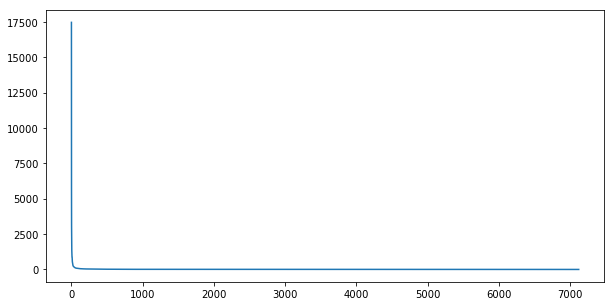

In [61]:
plt.figure(figsize=(10,5))
plt.plot(S)
plt.show()

We can see that most eigenvalues are small, let's look instead at the first 40.

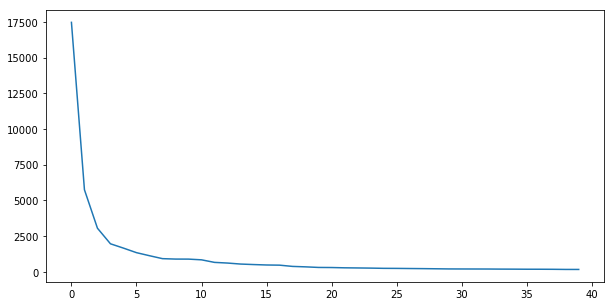

In [65]:
plt.figure(figsize=(10,5))
plt.plot(S[:40])
plt.show()

So, let's reduce from a 7122 dimentional space to a 40 dimentional space. We can use the matrix $U$ for this.

In [66]:
emb=U[:,:40]

and now the vector associated to the word 'dead' is:

In [74]:
emb[15,:]

array([-0.00791104, -0.00083521,  0.00439432, -0.00805074,  0.00531848,
       -0.00133171, -0.00302499,  0.00117412, -0.00454875,  0.00055155,
        0.00582076, -0.00129587,  0.01084845,  0.02268895,  0.02411184,
        0.00856278,  0.02157386,  0.00654601,  0.00588668, -0.00524872,
        0.01189016, -0.00390317,  0.00278568, -0.01376375,  0.02974842,
        0.02025969, -0.00425281, -0.00316112,  0.00405262, -0.00124522,
       -0.00172182,  0.00772912, -0.00119641,  0.00118621,  0.00360932,
       -0.00381933, -0.00829696, -0.00497969, -0.00335889, -0.00176856])

What's the meaning of this? We can thinking as relevant features from the model. Let's sort now in this space.

In [75]:
sorted(list_of_words, key = lambda word: cos_dis(emb[15,:],emb[list_of_words.index(word),:]))

/home/felipe/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


['dead',
 'fantastic',
 'gilded',
 'charles',
 'covered',
 'curious',
 'roses',
 'stained',
 'forms',
 'brain',
 'body',
 'fluted',
 'kind',
 'eastward',
 'piles',
 'christian',
 'images',
 'hovenia',
 'roots',
 'afford',
 'piazza',
 'degree',
 'monstrous',
 'reported',
 'sacking',
 'scented',
 'reformation',
 'dying',
 'survival',
 'waxed',
 'paul',
 'archbishop',
 'cunningly',
 'harlot',
 'sigismondo',
 'horrors',
 'separation',
 'pictured',
 'lover',
 'pear',
 'flight',
 'shimmering',
 'sevres',
 'freedom',
 'emathia',
 'clericalis',
 'stalk',
 'saddle',
 'ranged',
 'serve',
 'plates',
 'omnibuses',
 'hunters',
 'dainties',
 'justice',
 'ulster',
 'thief',
 'entrance',
 'roofs',
 'languid',
 'hundreds',
 'coiners',
 'hadjis',
 'reflectors',
 'figured',
 'decorated',
 'intense',
 'only',
 'refine',
 'comfortable',
 'dalmatics',
 'discovering',
 'greasy',
 'rainbow',
 'artists',
 'delicacy',
 'their',
 'fully',
 'violence',
 'highest',
 'garlands',
 'thinning',
 'themselves',
 'world'

it this better? Part of what this process does is to reduce noise.